Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pathlib

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/upgrad/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/upgrad/Test')

In [82]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

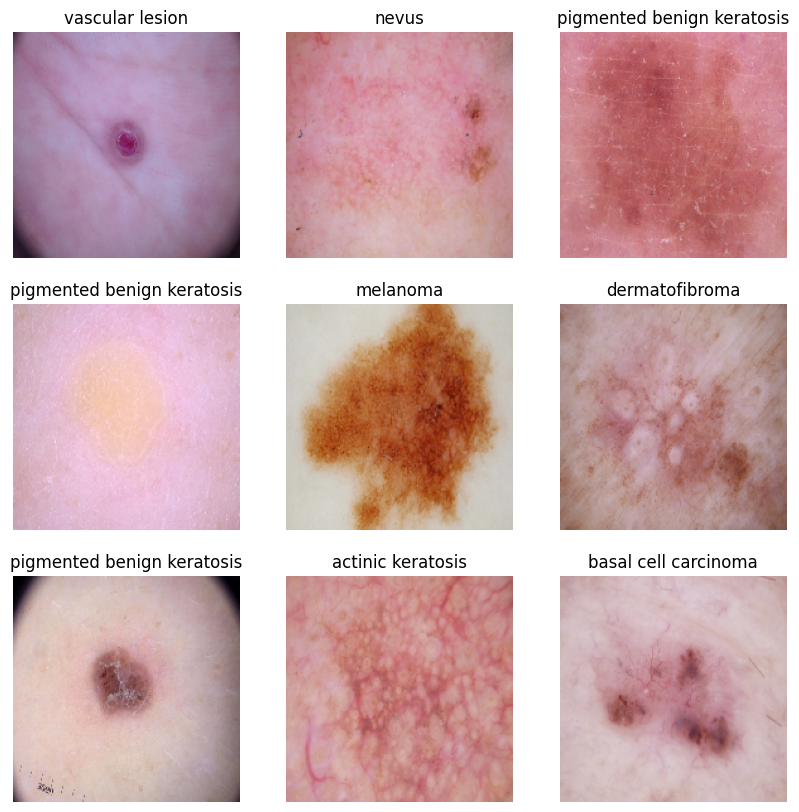

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
target_labels = 9
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [51]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 229ms/step - accuracy: 0.7303 - loss: 0.7514 - val_accuracy: 0.7372 - val_loss: 0.7208
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 248ms/step - accuracy: 0.7426 - loss: 0.6811 - val_accuracy: 0.7342 - val_loss: 0.7197
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 251ms/step - accuracy: 0.7468 - loss: 0.6681 - val_accuracy: 0.7439 - val_loss: 0.7138
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 226ms/step - accuracy: 0.7564 - loss: 0.6398 - val_accuracy: 0.7751 - val_loss: 0.6567
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 233ms/step - accuracy: 0.7659 - loss: 0.6404 - val_accuracy: 0.7550 - val_loss: 0.6772
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.7697 - loss: 0.6133 - val_accuracy: 0.7528 - val_loss: 0.6788
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 43s 250ms/step - accuracy: 0.7855 - loss: 0.5769 - val_accuracy: 0.7736 - val_loss: 0.6104
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 234ms/step - accuracy: 0.7852 - loss: 0

### Visualizing training results

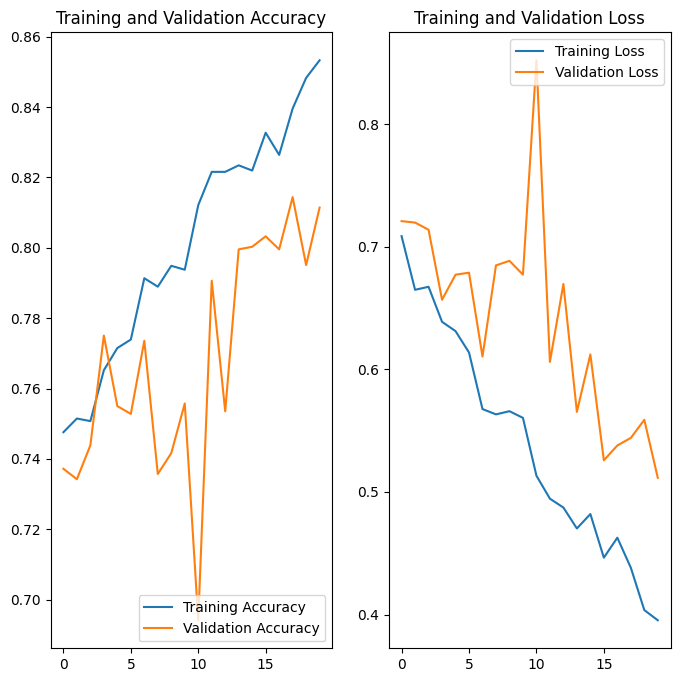

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Observations:

The model's training accuracy progressively improves, reaching up to 85%, yet the validation accuracy consistently hovers around 75%.

This high training accuracy suggests the model is fitting closely to the training data, potentially capturing noise within it. However, the low validation accuracy indicates that the model struggles to generalize beyond the training set.

These observations point to an overfitting issue. To address this, data augmentation techniques will be applied. Due to the limited amount of training data, additional samples will be created by slightly altering the existing data (such as by flipping images horizontally or vertically, making small rotations, etc.). These augmented samples will then be used to help train the model and improve its generalizability.

In [53]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
augmentation_data = keras.Sequential([
                                      layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.1),
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


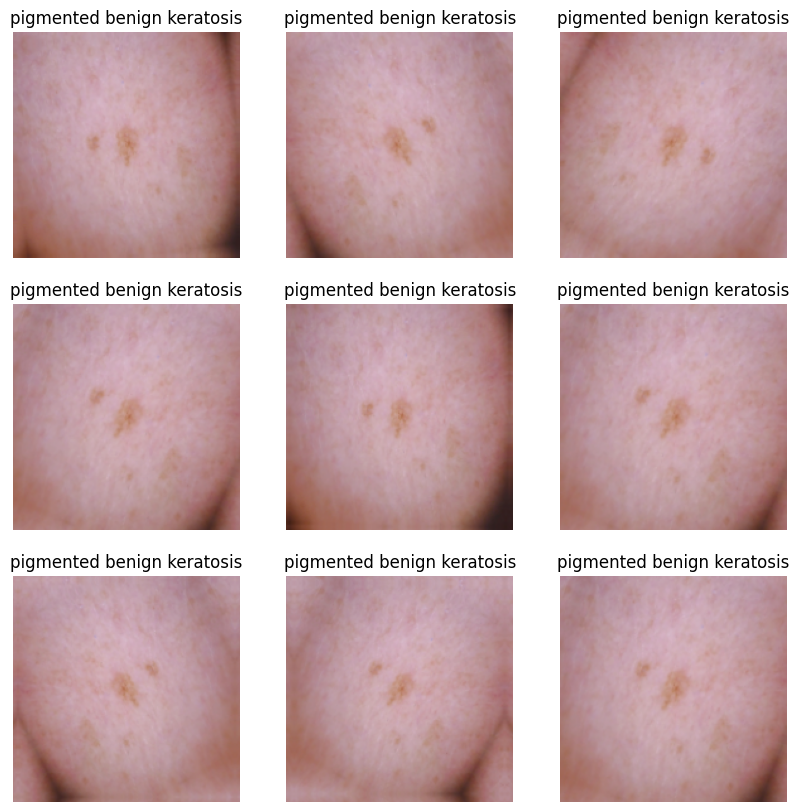

In [54]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [55]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here


model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Compiling the model

In [56]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [57]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 247ms/step - accuracy: 0.2146 - loss: 2.0330 - val_accuracy: 0.3935 - val_loss: 1.5099
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 235ms/step - accuracy: 0.4467 - loss: 1.4532 - val_accuracy: 0.4759 - val_loss: 1.3674
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 228ms/step - accuracy: 0.4787 - loss: 1.3531 - val_accuracy: 0.3794 - val_loss: 1.8339
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 247ms/step - accuracy: 0.4848 - loss: 1.3348 - val_accuracy: 0.4967 - val_loss: 1.3009
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 232ms/step - accuracy: 0.5205 - loss: 1.2313 - val_accuracy: 0.5301 - val_loss: 1.2544
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 248ms/step - accuracy: 0.5658 - loss: 1.1673 - val_accuracy: 0.5627 - val_loss: 1.1747
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 250ms/step - accuracy: 0.5683 - loss: 1.1495 - val_accuracy: 0.5984 - val_loss: 1.1205
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 232ms/step - accuracy: 0.5988 - loss: 1

### Visualizing the results

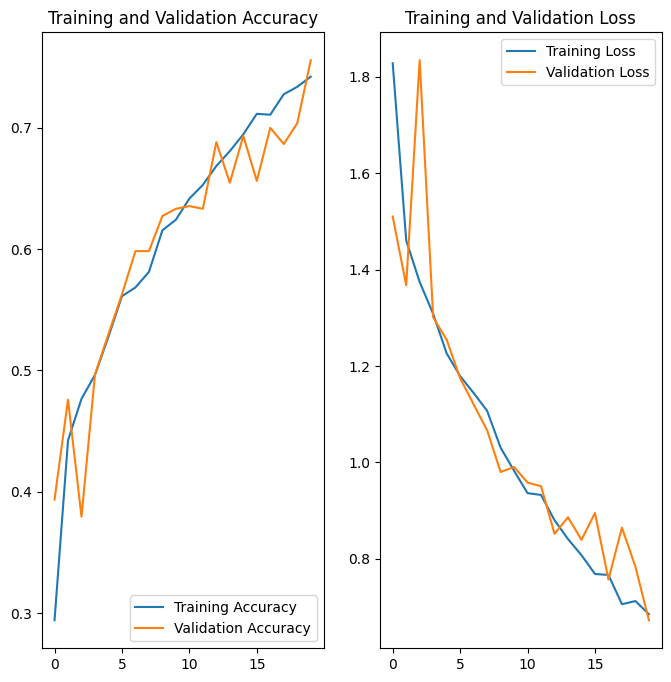

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Data augmentation eliminated overfitting, but the model now underfits. Training and validation accuracy are similarly poor, indicating insufficient model complexity.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [59]:
## Your code goes here.
from glob import glob

## find the image path for all class labels (lesions)
images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

## Extract the class labels (lesions)
lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesions_list))

2239


In [60]:
# Extracting image path and class label
image_dict = dict(zip(images_path_list, lesions_list))
print(list(image_dict.items())[:5])

[('/content/gdrive/My Drive/upgrad/Train/actinic keratosis/ISIC_0026468.jpg', 'actinic keratosis'), ('/content/gdrive/My Drive/upgrad/Train/actinic keratosis/ISIC_0026194.jpg', 'actinic keratosis'), ('/content/gdrive/My Drive/upgrad/Train/actinic keratosis/ISIC_0026171.jpg', 'actinic keratosis'), ('/content/gdrive/My Drive/upgrad/Train/actinic keratosis/ISIC_0026149.jpg', 'actinic keratosis'), ('/content/gdrive/My Drive/upgrad/Train/actinic keratosis/ISIC_0026040.jpg', 'actinic keratosis')]


In [61]:
# Viewing the image path and class label
lesions_df = pd.DataFrame(list(image_dict.items()), columns=['Image Path', 'Label'])
lesions_df.head()

,Image Path,Label
0,/content/gdrive/My Drive/upgrad/Train/actinic ...,actinic keratosis
1,/content/gdrive/My Drive/upgrad/Train/actinic ...,actinic keratosis
2,/content/gdrive/My Drive/upgrad/Train/actinic ...,actinic keratosis
3,/content/gdrive/My Drive/upgrad/Train/actinic ...,actinic keratosis
4,/content/gdrive/My Drive/upgrad/Train/actinic ...,actinic keratosis


In [62]:
# Inspecting the distribution of classes
lesions_df[['Label']].value_counts()

,count
Label,
pigmented benign keratosis,462
melanoma,438
basal cell carcinoma,376
nevus,357
squamous cell carcinoma,181
vascular lesion,139
actinic keratosis,114
dermatofibroma,95
seborrheic keratosis,77


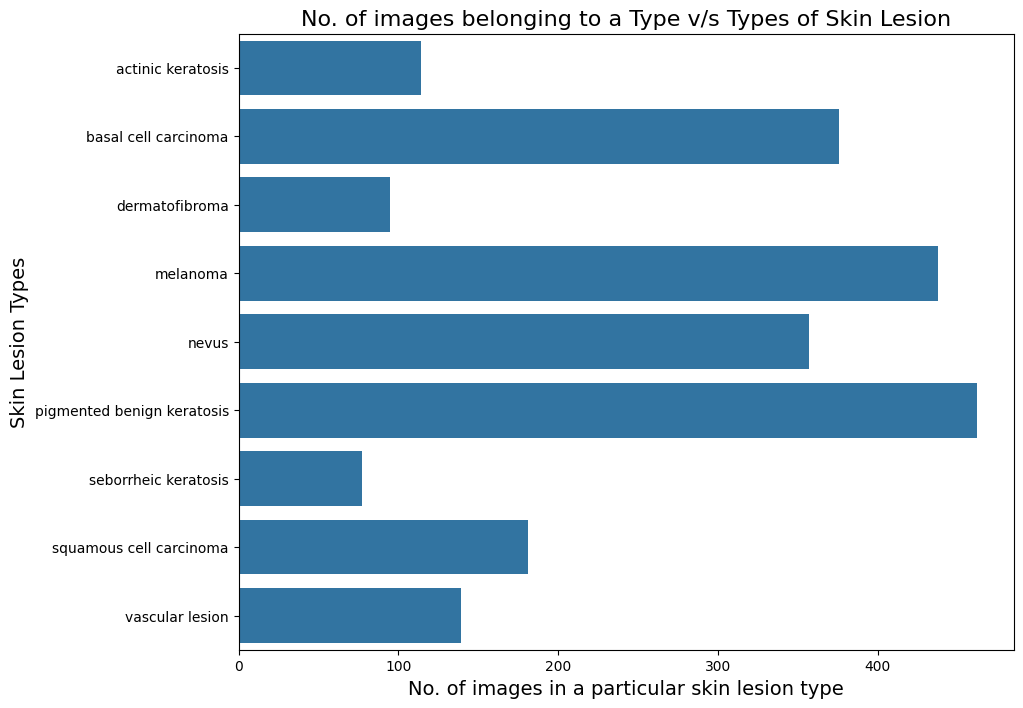

In [64]:
# Visualizing the distribution of classes

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y="Label", data=lesions_df)
plt.title('No. of images belonging to a Type v/s Types of Skin Lesion', fontsize=16)
plt.xlabel('No. of images in a particular skin lesion type', fontsize=14)
plt.ylabel('Skin Lesion Types', fontsize=14)
plt.show()

In [65]:
round(lesions_df[['Label']].value_counts(normalize=True)*100, 2)

,proportion
Label,
pigmented benign keratosis,20.63
melanoma,19.56
basal cell carcinoma,16.79
nevus,15.94
squamous cell carcinoma,8.08
vascular lesion,6.21
actinic keratosis,5.09
dermatofibroma,4.24
seborrheic keratosis,3.44


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Training data exhibits significant class imbalance:

- Seborrheic keratosis: 3.44% (underrepresented)
- Pigmented benign keratosis: 20.63% (overrepresented)
- Melanoma: 19.56% (overrepresented)

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [66]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [67]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/upgrad/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4930B52980>: 100%|██████████| 500/500 [00:20<00:00, 24.17 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/upgrad/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F48B8B6CD30>: 100%|██████████| 500/500 [00:18<00:00, 27.02 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/upgrad/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F48B8DEF6D0>: 100%|██████████| 500/500 [00:19<00:00, 25.80 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/upgrad/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4930B359F0>: 100%|██████████| 500/500 [01:24<00:00,  5.95 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/upgrad/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F491FF17DC0>: 100%|██████████| 500/500 [01:23<00:00,  5.98 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/upgrad/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F48B8AB09D0>: 100%|██████████| 500/500 [00:20<00:00, 24.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/upgrad/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F48B8DEC1F0>: 100%|██████████| 500/500 [00:41<00:00, 11.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/upgrad/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F48FE5B3280>: 100%|██████████| 500/500 [00:18<00:00, 26.71 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/upgrad/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4930B35C00>: 100%|██████████| 500/500 [00:19<00:00, 25.34 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [68]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [69]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/upgrad/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031609.jpg_e5d29c4f-1c8c-4808-87aa-916ac22218a6.jpg',
 '/content/gdrive/My Drive/upgrad/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031381.jpg_468fabca-3550-4009-a650-0171306c81f0.jpg',
 '/content/gdrive/My Drive/upgrad/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028370.jpg_48355692-e514-43e7-968c-7d251f8d1ca8.jpg',
 '/content/gdrive/My Drive/upgrad/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031228.jpg_ac127bd5-dcd7-485d-8cef-fd7442b968b9.jpg',
 '/content/gdrive/My Drive/upgrad/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030408.jpg_dabb144e-91e5-49f7-a0f8-831c95618ce5.jpg',
 '/content/gdrive/My Drive/upgrad/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026765.jpg_30759056-ba37-4fe8-9912-4df8f4518297.jpg',
 '/content/gdrive/My Drive/upgrad/Train/actinic keratosis/output/actinic keratosis_origi

In [70]:
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [71]:
dataframe_dict_new = dict(zip(path_list, lesion_list))

In [72]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([lesions_df, df2])

In [73]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,1462
melanoma,1438
basal cell carcinoma,1376
nevus,1357
squamous cell carcinoma,1181
vascular lesion,1139
actinic keratosis,1114
dermatofibroma,1095
seborrheic keratosis,1077


In [74]:
# Inspecting the classes by adding 500 samples per label
round(new_df['Label'].value_counts(normalize=True)*100, 2)

,proportion
Label,
pigmented benign keratosis,13.01
melanoma,12.79
basal cell carcinoma,12.24
nevus,12.07
squamous cell carcinoma,10.51
vascular lesion,10.13
actinic keratosis,9.91
dermatofibroma,9.74
seborrheic keratosis,9.58


We added 500 images to all the classes to maintain class balance. We can add more if we want to improve training process.

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [75]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [76]:
data_dir_train=pathlib.Path("/content/gdrive/My Drive/upgrad/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [77]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [79]:
## your code goes here

model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [80]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [84]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 61s 216ms/step - accuracy: 0.4891 - loss: 1.2632 - val_accuracy: 0.4962 - val_loss: 1.2553
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - accuracy: 0.5307 - loss: 1.1666 - val_accuracy: 0.5452 - val_loss: 1.1171
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 63s 222ms/step - accuracy: 0.5640 - loss: 1.1281 - val_accuracy: 0.5496 - val_loss: 1.1480
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 222ms/step - accuracy: 0.5660 - loss: 1.0961 - val_accuracy: 0.5118 - val_loss: 1.4499
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 62s 219ms/step - accuracy: 0.5817 - loss: 1.0454 - val_accuracy: 0.5194 - val_loss: 1.4483
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 219ms/step - accuracy: 0.5992 - loss: 1.0290 - val_accuracy: 0.5421 - val_loss: 1.1147
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - accuracy: 0.6179 - loss: 0.9637 - val_accuracy: 0.5069 - val_loss: 1.4597
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 93s 257ms/step - accuracy: 0.6379 - loss: 0

#### **Todo:**  Visualize the model results

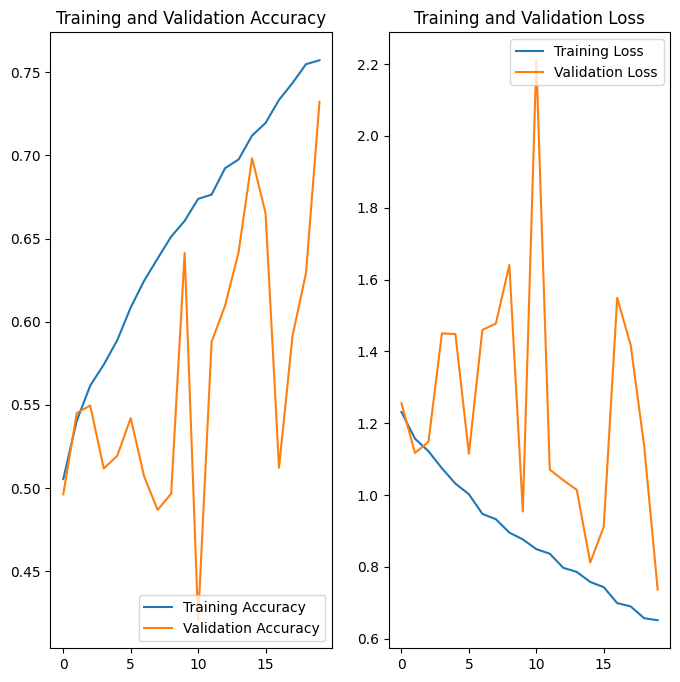

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Experimentation with batch normalization yielded modest gains in both training and validation accuracy. To further optimize performance, an alternative architecture excluding batch normalization will be investigated, aiming to identify potential accuracy improvements.

Creating another model (without batch normalization)

In [86]:
# create the model
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# ModelCheckpoint callback is used along with the model.fit() training process to periodically save the model/weights
checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# Early stop the training when it doesn't show improvement
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

Training the model

In [ ]:
%%time
# train the model
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint, earlystop]
)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.2873 - loss: 1.8307
Epoch 1: val_accuracy improved from -inf to 0.47441, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 59s 211ms/step - accuracy: 0.2875 - loss: 1.8301 - val_accuracy: 0.4744 - val_loss: 1.4131
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.4505 - loss: 1.4513
Epoch 2: val_accuracy improved from 0.47441 to 0.48821, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 213ms/step - accuracy: 0.4505 - loss: 1.4511 - val_accuracy: 0.4882 - val_loss: 1.3459
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4903 - loss: 1.3544
Epoch 3: val_accuracy improved from 0.48821 to 0.56609, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 212ms/step - accuracy: 0.4903 - loss: 1.3542 - val_accuracy: 0.5661 - val_loss: 1.1468
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5346 - loss: 1.2090
Epoch 4: val_accuracy improved from 0.5

Visualize the model results

In [1]:
model.summary()

NameError: name 'model' is not defined

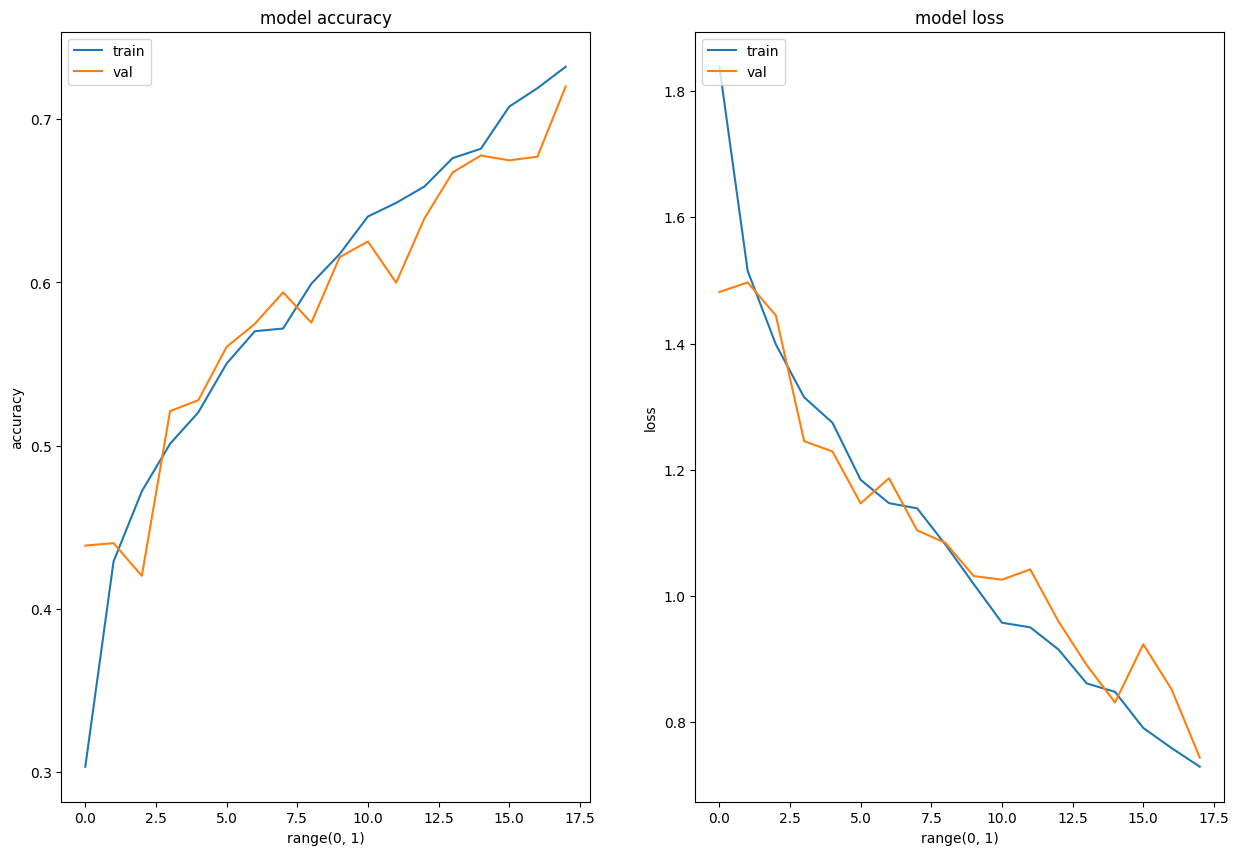

In [49]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The refined model demonstrates exceptional performance, exhibiting no signs of underfitting or overfitting. Class rebalancing significantly improved accuracy, reaching 84% on the training set and 79% on the validation set after 37 epochs. Notably, batch normalization did not yield additional accuracy gains. The narrow divergence between training and validation accuracies highlights the model's excellent generalization capabilities.

Model Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Actual: basal cell carcinoma
Predicted: pigmented benign keratosis


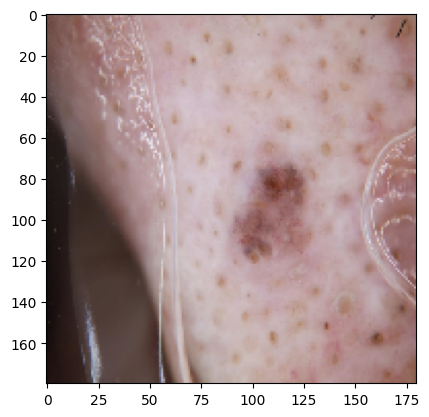

In [50]:
# Evaluating the model on an instances in test

from tensorflow.keras.preprocessing.image import load_img

image_path_test = os.path.join(data_dir_test, class_names[1], '*')
test_image = glob(image_path_test)
test_image = load_img(test_image[-1], target_size=(180, 180, 3))
plt.imshow(test_image)
plt.grid(False)

img = np.expand_dims(test_image, axis=0)
predicted = model.predict(img)
predicted = np.argmax(predicted)
predicted_class = class_names[predicted]
print("Actual: " + class_names[1] +'\n'+ "Predicted: " + predicted_class)